Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [3]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('C://Users//asus//Downloads//machine learning//Multiple-Disease-Prediction-using-Machine-Learning-1//dataset//diabetes.csv')


In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


perform svm,logisticregression,randomforestclassifier,KNeighborsClassifier,DecisionTreeClassifier,MLPClassifier

Dataset loaded. Training data shape: (614, 8), Test data shape: (154, 8)

--- Training and Evaluating Models ---


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:03:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Comparative Analysis ---
SVM: 0.7727 (77.27%)
Logistic Regression: 0.7532 (75.32%)
Random Forest: 0.7208 (72.08%)
KNN: 0.7143 (71.43%)
Decision Tree: 0.6948 (69.48%)
Neural Network: 0.6558 (65.58%)
XGBoost: 0.7403 (74.03%)

✅ Best Model: SVM with accuracy of 0.7727 (77.27%)


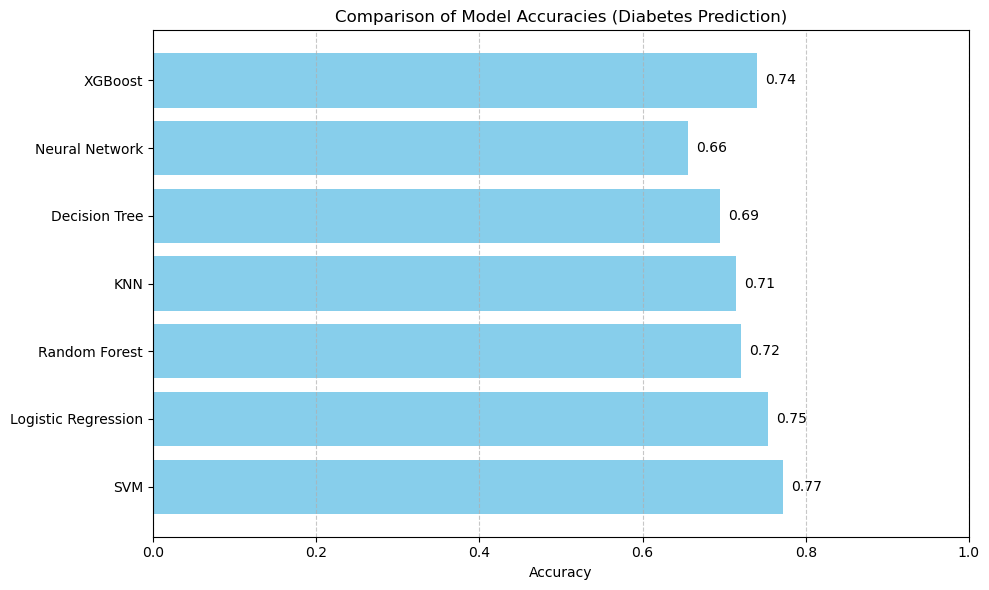

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# --- 1. Load and Prepare the Dataset ---
try:
    diabetes_dataset = pd.read_csv('C://Users//asus//Downloads//machine learning//Multiple-Disease-Prediction-using-Machine-Learning-1//dataset//diabetes.csv')
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please check the path.")
    exit()

X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(f"Dataset loaded. Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Standardize data for models that need scaling
scaler = StandardScaler()
scaler_nn = StandardScaler()

X_train_scaled_knn = scaler.fit_transform(X_train)
X_test_scaled_knn = scaler.transform(X_test)

X_train_scaled_nn = scaler_nn.fit_transform(X_train)
X_test_scaled_nn = scaler_nn.transform(X_test)

# --- 2. Train and Evaluate Models ---
print("\n--- Training and Evaluating Models ---")
model_accuracies = {}

# SVM
svm_model = svm.SVC(kernel='linear', random_state=2)
svm_model.fit(X_train, Y_train)
model_accuracies["SVM"] = accuracy_score(svm_model.predict(X_test), Y_test)

# Logistic Regression
lr_model = LogisticRegression(solver='liblinear', random_state=2)
lr_model.fit(X_train, Y_train)
model_accuracies["Logistic Regression"] = accuracy_score(lr_model.predict(X_test), Y_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)
model_accuracies["Random Forest"] = accuracy_score(rf_model.predict(X_test), Y_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled_knn, Y_train)
model_accuracies["KNN"] = accuracy_score(knn_model.predict(X_test_scaled_knn), Y_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=2)
dt_model.fit(X_train, Y_train)
model_accuracies["Decision Tree"] = accuracy_score(dt_model.predict(X_test), Y_test)

# Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=2)
mlp_model.fit(X_train_scaled_nn, Y_train)
model_accuracies["Neural Network"] = accuracy_score(mlp_model.predict(X_test_scaled_nn), Y_test)

# XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=2)
xgb_model.fit(X_train, Y_train)
model_accuracies["XGBoost"] = accuracy_score(xgb_model.predict(X_test), Y_test)

# --- 3. Comparative Analysis ---
print("\n--- Comparative Analysis ---")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f} ({acc*100:.2f}%)")

# Identify best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with accuracy of {best_model_accuracy:.4f} ({best_model_accuracy*100:.2f}%)")

# --- 4. Plot Accuracy Comparison ---
plt.figure(figsize=(10,6))
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies (Diabetes Prediction)')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')
plt.tight_layout()
plt.show()


Train Test Split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [15]:
classifier = svm.SVC(kernel='linear')

In [16]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [17]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [18]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [19]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [20]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Saving the trained model

In [21]:
import pickle

In [22]:
filename = 'svm_diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [23]:
# loading the saved model
loaded_model = pickle.load(open('svm_diabetes_model.sav', 'rb'))

In [24]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [25]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
